# "BookHub: Análisis de Datos de librería digital"

## Descripción
El mundo se vio impactado por la pandemia del coronavirus, transformando las rutinas diarias de las personas en todo el planeta. En respuesta a este cambio, surgió un aumento significativo en el tiempo dedicado a la lectura en casa, generando un interés creciente en el desarrollo de nuevas aplicaciones para los amantes de los libros por parte de startups emergentes.

En este contexto, se ha proporcionado una base de datos de uno de los servicios que compiten en este mercado. Esta base de datos contiene una amplia variedad de información, incluyendo datos sobre libros, editoriales, autores, calificaciones de clientes y reseñas de libros. La misión es realizar un análisis exhaustivo de estos datos para generar una propuesta de valor sólida y significativa para un nuevo producto que satisfaga las necesidades y preferencias de los lectores en este nuevo panorama.

## Objetivo General
Analizar los datos proporcionados en la base de datos del servicio de libros para desarrollar una propuesta de valor integral y efectiva para un nuevo producto destinado a los amantes de la lectura, teniendo en cuenta el cambio en las tendencias de consumo de libros debido a la pandemia del coronavirus.

## Objetivos Específicos

- Encontrar el número de libros publicados después del 1 de enero de 2000.
- Encontrar el número de reseñas de usuarios y la calificación promedio para cada libro.
- Identificar la editorial que ha publicado el mayor número de libros con más de 50 páginas.
- Identificar al autor que tiene la más alta calificación promedio del libro: considerar solo los libros con al menos 50 calificaciones.
- Encontrar el número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros.

### Descripción de los datos

**`books`**

Contiene datos sobre libros:

- `book_id`: identificación del libro
- `author_id`: identificación del autor o autora
- `title`: título
- `num_pages`: número de páginas
- `publication_date`: fecha de la publicación
- `publisher_id`: identificación de la editorial

**`authors`**

Contiene datos sobre autores:

- `author_id`: identificación del autor o autora
- `author`: el autor o la autora

**`publishers`**

Contiene datos sobre editoriales:

- `publisher_id`: identificación de la editorial
- `publisher`: la editorial

**`ratings`**

Contiene datos sobre las calificaciones de usuarios:

- `rating_id`: identificación de la calificación
- `book_id`: identificación del libro
- `username`: el nombre del usuario que revisó el libro
- `rating`: calificación

**`reviews`**

Contiene datos sobre las reseñas de los y las clientes:

- `review_id`: identificación de la reseña
- `book_id`: identificación del libro
- `username`: el nombre del usuario que revisó el libro
- `text`: el texto de la reseña

### Diagrama de Datos

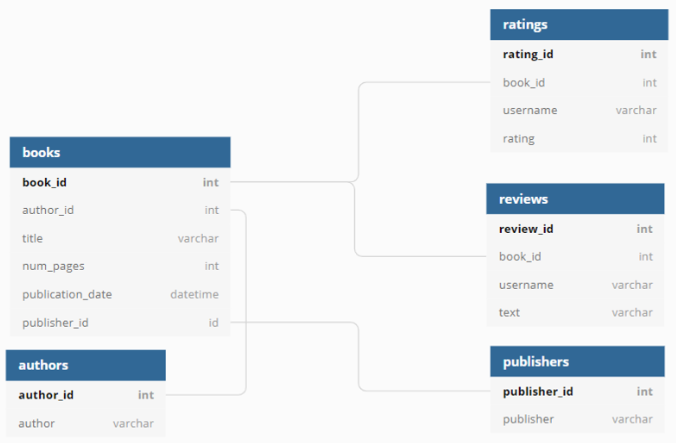

### Configuración Inicial

In [1]:
# importar librerías
import pandas as pd
from sqlalchemy import create_engine

# Configuración de la base de datos
db_config = {'user': 'practicum_student',            # nombre de usuario
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs',      # contraseña
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net', 
             'port': 6432,                           # puerto de conexión
             'db': 'data-analyst-final-project-db'}  # nombre de la db

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                         db_config['pwd'],
                                                         db_config['host'],
                                                         db_config['port'],
                                                         db_config['db'])
                                                         
# Crear el motor de base de datos
engine = create_engine(connection_string, connect_args={'sslmode': 'require'})

In [2]:
# Definir función para mostrar consulta SQL
def show(query, con=engine):
    """
    Función que ejecuta una consulta SQL y devuelve resultado como Df de pandas.

    Args:
        query: La consulta SQL a ejecutar.
        engine: El objeto de conexión a la base de datos.

    Returns:
        Un DataFrame de pandas con el resultado de la consulta.
    """
    return pd.io.sql.read_sql(query, con=con)


## Exploración inicial de Datos

Se procede a mostrar las primeras filas de las tablas alojadas en la base de datos.

### books

In [3]:
# Mostrar primeras 10 filas de la tabla books
query = ''' SELECT * FROM books
            LIMIT 10; '''
show(query)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
5,6,257,1st to Die (Women's Murder Club #1),424,2005-05-20,116
6,7,258,2nd Chance (Women's Murder Club #2),400,2005-05-20,116
7,8,260,4th of July (Women's Murder Club #4),448,2006-06-01,318
8,9,563,A Beautiful Mind,461,2002-02-04,104
9,10,445,A Bend in the Road,341,2005-04-01,116


Cada libro tiene su propia id y título, además puede relacionarse con datos de autores y Editoriales.

### authors

In [4]:
# Mostrar primeras 10 filas de la tabla authors
query = ''' SELECT * FROM authors
            LIMIT 10; '''
show(query)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
5,6,Alan Paton
6,7,Albert Camus/Justin O'Brien
7,8,Aldous Huxley
8,9,Aldous Huxley/Christopher Hitchens
9,10,Aleksandr Solzhenitsyn/H.T. Willetts


Cada autor tiene su propia id numérica asignada al nombre en orden alfabético.

### publishers

In [5]:
# Mostrar primeras 10 filas de la tabla publishers
query = ''' SELECT * FROM publishers
            LIMIT 10; '''
show(query)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
5,6,Aladdin
6,7,Aladdin Paperbacks
7,8,Albin Michel
8,9,Alfred A. Knopf
9,10,Alfred A. Knopf Books for Young Readers


Cada editorial se ordena en orden alfabético y su id respectivamente en orden numérico.

### ratings

In [17]:
# Mostrar primeras 10 filas de la tabla ratings
query = ''' SELECT * FROM ratings
            ORDER BY rating DESC
            LIMIT 10; '''
show(query)

,rating_id,book_id,username,rating
0,30,8,williamsangela,5
1,31,8,cassandra90,5
2,15,5,znelson,5
3,21,6,adamsabigail,5
4,3,1,brandtandrea,5
5,7,3,scotttamara,5
6,8,3,lesliegibbs,5
7,9,4,abbottjames,5
8,20,6,serranoangela,5
9,35,9,thomas49,5


Cada usuario registrado ha dado una calificación numérica a cada libro. Cada libro se asigna por id y cada calificación registrada tiene identificación única. La calificación máxima es de 5.

### reviews

In [7]:
# Mostrar primeras 10 filas de la tabla reviews
show('''SELECT * 
        FROM reviews
        LIMIT 10;''')

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...
5,6,3,lesliegibbs,Analysis no several cause international.
6,7,4,valenciaanne,One there cost another. Say type save. With pe...
7,8,4,abbottjames,Within enough mother. There at system full rec...
8,9,5,npowers,Thank now focus realize economy focus fly. Ite...
9,10,5,staylor,Game push lot reduce where remember. Including...


Cada usuario desde su nickname ha escrito su reseña a cada libro asignado por su id. Cada reseña tiene un id único.

## Número de libros después de 01-01-2000

In [8]:
# Mostrar número de libros publicados después del 1 de enero de 2020
show('''SELECT COUNT(book_id) 
        FROM books 
        WHERE publication_date > '2000-01-01';''')

,count
0,819


819 son los libros publicados después del 1 de enero de 2000.

## Número de reseñas y calificación media de cada libro

Se procede a fusionar las tablas de reseñas y calificaciones por las columnas 'book_id' y 'username'

In [16]:
# Mostrar número de reseñas de usarios y promedio de calificaciones por libro
show('''SELECT 
            books.book_id AS book_id,
            books.title AS title,
            authors.author AS author,
            COUNT(reviews.review_id) AS review_count,
            ROUND(AVG(ratings.rating),2) AS avg_rating
        FROM   
            books
        ------------------------------------------------------------
        INNER JOIN
            authors ON books.author_id = authors.author_id
        INNER JOIN 
            reviews ON books.book_id = reviews.book_id
        INNER JOIN 
            ratings ON (reviews.book_id = ratings.book_id) 
                        AND (reviews.username = ratings.username)
        -------------------------------------------------------------
        GROUP BY 
            books.book_id,
            authors.author
        ORDER BY 
            review_count DESC, 
            avg_rating DESC;''')

,book_id,title,author,review_count,avg_rating
0,948,Twilight (Twilight #1),Stephenie Meyer,7,3.71
1,695,The Curious Incident of the Dog in the Night-Time,Mark Haddon,6,4.67
2,734,The Glass Castle,Jeannette Walls,6,4.50
3,302,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,6,4.50
4,750,The Hobbit or There and Back Again,J.R.R. Tolkien,6,4.17
...,...,...,...,...,...
989,872,The Social Contract,Jean-Jacques Rousseau/Maurice Cranston,1,3.00
990,943,Tsubasa: RESERVoir CHRoNiCLE Vol. 1,CLAMP/Anthony Gerard,1,2.00
991,186,Death: The High Cost of Living,Neil Gaiman/Chris Bachalo/Mark Buckingham/Tori...,1,2.00
992,226,Everyday Italian: 125 Simple and Delicious Rec...,Giada De Laurentiis,1,2.00


El libro con más reseñas de texto es Twilight (Twilight#1) de Stephenie Meyer, 7 reseñas con una calificación promedio de 3.71/5.00. En último lugar Debt of Honor (Jack Ryan #7) de Tom Clancy con una reseña y una calificación de 2/5.

El mejor calificado y alto número de reseñas fue The Curious Incidente of the Dog in the Night-Time de MArk Haddon.

## Editorial con más libros superiores a 50 páginas

Se procede a fusionar la tabla general de libros con la de editoriales para encontrar la editorial que ha publicado el mayor número de libros con más de 50 páginas.

In [10]:
# Mostrar editorial con más libros de más de 50 páginas
show('''SELECT 
            publishers.publisher_id,
            publishers.publisher,
            COUNT(books.book_id) AS book_count
        FROM
            publishers
        ------------------------------------------------------------
        LEFT JOIN 
            books ON publishers.publisher_id = books.publisher_id
        WHERE
            books.num_pages > 50
        ------------------------------------------------------------
        GROUP BY 
            publishers.publisher_id
        ORDER BY 
            book_count DESC
        ------------------------------------------------------------
        LIMIT 3;''')


,publisher_id,publisher,book_count
0,212,Penguin Books,42
1,309,Vintage,31
2,116,Grand Central Publishing,25


La editorial Penguin Books es la que mayor cantidad de títulos de más de 50 páginas ha publicado, con un total de 42 títulos.

## Autor con mayor calificación de obras
Se fusionan las tablas authors y ratings considerando solamente los libros con un mínimo de 50 calificaciones.

In [18]:
# Mostrar autor con mayor calificación promedio de obras
show('''SELECT
            authors.author_id,
            authors.author,
            COUNT(ratings.rating_id) AS rating_count,
            ROUND(AVG(ratings.rating),2) AS AVG_rating
        FROM
            authors
        ------------------------------------------------------------
        LEFT JOIN 
            books ON authors.author_id = books.author_id
        INNER JOIN 
            ratings ON books.book_id = ratings.book_id
        ------------------------------------------------------------
        GROUP BY 
            authors.author_id
        HAVING 
            COUNT(ratings.rating_id) >= 50
        ORDER BY
            AVG_rating DESC
        ------------------------------------------------------------
        LIMIT 3;''')

,author_id,author,rating_count,avg_rating
0,130,Diana Gabaldon,50,4.30
1,236,J.K. Rowling/Mary GrandPré,312,4.29
2,3,Agatha Christie,53,4.28


De todos los autores que han sido calificados al menos 50 veces, Diana Gabaldon encabeza la lista con una calificación promedio de 4.3

## Número promedio de reseñas por usuarios que calificaron más de 50 libros

Se procede a filtrar los usuarios que calificaron más de 50 libros.
Contar el número de reseñas realizadas por estos usuarios y obtener el promedio de ese recuento.

In [23]:
# Mostrar el promedio de la cantidad de reseñas por usuario que  
# calificaron más de 50 libros
show('''SELECT 
            COUNT(num_reviews) AS reviewer_cnt,
            ROUND(AVG(num_reviews), 2) AS avg_reviews_cnt
        FROM (
            SELECT COUNT(review_id) AS num_reviews
            FROM reviews
            --------------------------------------------------
            WHERE username IN (               
                                SELECT username
                                FROM ratings
                                GROUP BY username
                                HAVING COUNT(book_id) > 50
                            )
            GROUP BY username
            --------------------------------------------------
        ) AS user_reviews;''')

,reviewer_cnt,avg_reviews_cnt
0,6,24.33


En promedio se realizaron 24.33 reseñas de texto entre 6 usuarios que fueron los que calificaron más de 50 libros. Es decir, en promedio cada uno de ellos.